### <strong><font color=cornflowerblue>第六次作品：元件間連接方式的可靠度分析與模擬 </font></strong>
學號：411078064

姓名：謝意盛
<hr>

### <strong><font color=lightseagreen>作品目標</font></strong>：
本實驗探討元件間連接方式的可靠度分析，分別模擬元件串聯與並聯的情況，並通過三種估計方式來估計此情況下的元件分佈參數，分別是 "最小平方法 LSM"、"最大概似估計 MLE"、以及 "動差估計 MME"。接著，結合串聯與並聯去進行模擬，一樣通過三種估計方式來估計此情況下的元件分佈參數。

<hr>

#### <strong><font color=indianred>載入套件</font></strong>：


In [2]:
from platform import python_version
import os, time, socket
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
from scipy.optimize import minimize

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))

【日期時間】2024/12/18 13:57:24
【工作目錄】c:\Users\Sheng\Desktop\StatComp\hw6
【主機名稱】LAPTOP-VLOELI2C (10.201.9.97)
【Python】3.11.3


<hr>

### <strong><font color=cornflowerblue>目標一</font></strong>：
本目標想要估計出串聯元件的 Beta 分佈參數，以下為實驗步驟：

假設兩獨立變數：$X \sim \beta(a_1, b_1)$，$Y \sim \beta(a_2, b_2)$，結合形成一新變數 $Z = XY$，推導後可得其機率密度函數為
$$f(z) = \int_z^1 f_Y(y)f_X(z/y) \frac{1}{y} \;dy$$

首先，本實驗想從理論上獲得由上述 $Z$ 的 PDF 所近似出的另一個 Beta 分配 $\beta(a, b)$，並估計出其參數， 方法為
$$ \min_{\substack{a, b > 0}} \int_{0}^{1} (f(z) - \beta(z|a,b))^2 \; dz $$

令 $X$, $Y$ 的 Beta 機率密度函數的參數分別為 $(a_1, b_1)=(6, 3), (a_2, b_2)=(9, 5)$，利用上述方法估計出參數 $a, b$。

接著，

**<font color=indianred>Step 1</font>**：分別決定出本次實驗的兩組樣本所來自的母體參數值，即混合常態分配之參數值，並繪圖呈現其分佈情況，以及加上組成該分配的兩組常態分配的分佈圖

1. let 2 beta distribution,
2. 找理論上這兩個分佈的結合，
3. 通過該分佈近似出新的 beta distribution
4. 可再設多幾個原件，同樣按照上面的步驟去估計出新的 beta distribution

Estimated parameters: a = 6.00, b = 8.00


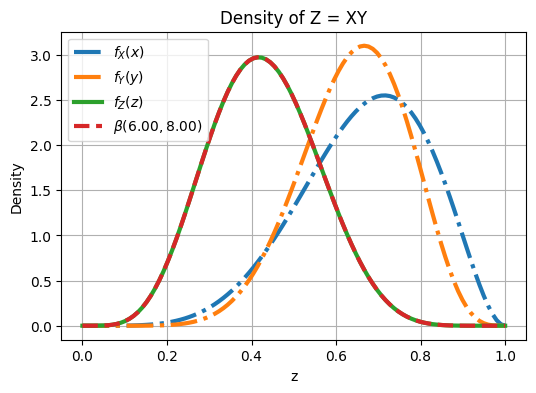

In [2]:
# 設定參數
a1, b1, a2, b2 = 6, 3, 9, 5
# 設定 X, Y 的分配
fx = lambda x: beta.pdf(x, a1, b1)
fy = lambda y: beta.pdf(y, a2, b2)

z = np.linspace(0, 1, 100)
def f(z):
    fxy = lambda y : fy(y) * fx(z / y) / y  # define the integrand: inline
    tmp = integrate.quad(fxy, z, 1)
    return tmp[0]
fz = np.vectorize(f)(z)  # z 如果是 array，就會自動對每個元素呼叫 f，並且返回一個 array

# 用另一個貝他分配 \beta(a,b) 來近似 Z 的分配
# 定義最小值函數
def est_beta_param(params):
    a, b = params
    beta_pdf = lambda z: beta.pdf(z, a, b)
    integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
    integral = integrate.quad(integrand, 0, 1)
    return integral[0]

# 初始值
initial = [2, 2]
# 設定邊界
bounds = [(0, np.inf), (0, np.inf)]

# 使用 minimize 來最小化目標函數
result = minimize(est_beta_param, initial, bounds = bounds \
                  , method = 'L-BFGS-B')
# 獲取估計的參數
a_hat, b_hat = result.x
print(f"Estimated parameters: a = {{:.2f}}, b = {{:.2f}}".format(a_hat, b_hat))

# 畫圖
fig = plt.figure(figsize=(6, 4))
plt.plot(z, fx(z), label='$f_X(x)$', linestyle='-.', linewidth = 3)
plt.plot(z, fy(z), label='$f_Y(y)$', linestyle='-.', linewidth = 3)
plt.plot(z, fz, label='$f_Z(z)$', linewidth = 3)
plt.plot(z, beta.pdf(z, a_hat, b_hat), linestyle='--', linewidth = 3 \
         , label = '$\\beta({:.2f}, {:.2f})$'.format(a_hat, b_hat))
plt.xlabel('z')
plt.ylabel('Density')
plt.title('Density of Z = XY')
plt.grid()
plt.legend()
plt.show()

In [7]:
# 設定參數
a1, b1, a2, b2 = 6, 3, 9, 5
# 設定 X, Y 的分配
fx = lambda x: beta.pdf(x, a1, b1)
fy = lambda y: beta.pdf(y, a2, b2)

z = np.linspace(0, 1, 100)
def f(z):
    fxy = lambda y : fy(y) * fx(z / y) / y  # define the integrand: inline
    tmp = integrate.quad(fxy, z, 1)
    return tmp[0]
fz = np.vectorize(f)(z)  # z 如果是 array，就會自動對每個元素呼叫 f，並且返回一個 array

# 用另一個貝他分配 \beta(a,b) 來近似 Z 的分配
# 定義最小值函數
def est_beta_param(params):
    a, b = params
    beta_pdf = lambda z: beta.pdf(z, a, b)
    integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
    integral = integrate.quad(integrand, 0, 1)
    return integral[0]

# 初始值
initial = [2, 2]
# 設定邊界
bounds = [(0, np.inf), (0, np.inf)]

# 使用 minimize 來最小化目標函數
# method = 'CG', 'BFGS', 'Newton-CG', 'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov' 需要 Jacobian
methods = ['Nelder-Mead', 'Powell', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP', 'trust-constr']
a_hat = np.zeros(len(methods))
b_hat = np.zeros(len(methods))
times = np.zeros(len(methods))

for i, method in enumerate(methods):
    # 開始時間
    start_time = time.time()
    # 使用 minimize 來最小化目標函數
    result = minimize(est_beta_param, initial, bounds = bounds \
                      , method = method)
    # 結束時間
    end_time = time.time()

    # 獲取估計的參數
    a_hat[i], b_hat[i] = result.x
    times[i] = end_time - start_time
    print(f"Method: {method}, Estimated parameters: a = {a_hat[i]:.2f}, b = {b_hat[i]:.2f}, Time: {times[i]:.4f} seconds")

Method: Nelder-Mead, Estimated parameters: a = 6.00, b = 8.00, Time: 15.8531 seconds
Method: Powell, Estimated parameters: a = 6.00, b = 8.00, Time: 27.0635 seconds
Method: L-BFGS-B, Estimated parameters: a = 6.00, b = 8.00, Time: 6.3063 seconds
Method: TNC, Estimated parameters: a = 6.00, b = 8.00, Time: 16.3148 seconds
Method: COBYLA, Estimated parameters: a = 6.00, b = 8.00, Time: 40.7941 seconds
Method: SLSQP, Estimated parameters: a = 6.00, b = 8.00, Time: 6.6926 seconds
Method: trust-constr, Estimated parameters: a = 6.00, b = 8.00, Time: 7.1158 seconds


In [8]:
algo_method = pd.DataFrame({
    'Method': methods,
    'a_hat': a_hat,
    'b_hat': b_hat,
    'times': times
})
algo_method.sort_values(by = 'times').reset_index(drop = True)

,Method,a_hat,b_hat,times
0,L-BFGS-B,6.000104,8.000133,6.306318
1,SLSQP,5.999804,8.000263,6.692552
2,trust-constr,6.000002,8.000003,7.115797
3,Nelder-Mead,5.999979,7.999994,15.853052
4,TNC,5.998797,7.998314,16.314767
5,Powell,5.999962,7.999950,27.063501
6,COBYLA,5.999564,7.999255,40.794114


<hr>

### <strong><font color=cornflowerblue>目標二</font></strong>：



In [4]:
## 定義多變量函數最小值
def LSM(a1, b1, a2, b2):
    # 設定 X, Y 的分配
    fx = lambda x: beta.pdf(x, a1, b1)
    fy = lambda y: beta.pdf(y, a2, b2)

    # z = np.linspace(0, 1, 100)
    def f(z):
        fxy = lambda y : fy(y) * fx(z / y) / y  # define the integrand: inline
        tmp = integrate.quad(fxy, z, 1)
        return tmp[0]
    # fz = np.vectorize(f)(z)  # z 如果是 array，就會自動對每個元素呼叫 f，並且返回一個 array

    # 用另一個貝他分配 \beta(a,b) 來近似 Z 的分配
    # 定義最小值函數
    def est_beta_param(params):
        a, b = params
        beta_pdf = lambda z: beta.pdf(z, a, b)
        integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
        integral = integrate.quad(integrand, 0, 1)
        return integral[0]

    # 初始值
    initial = [6, 8]
    # 設定邊界
    bounds = [(0, np.inf), (0, np.inf)]

    # 使用 minimize 來最小化目標函數
    result = minimize(est_beta_param, initial, bounds = bounds \
                        , method = 'L-BFGS-B')

    # 獲取估計的參數
    a_hat, b_hat = result.x
    return a_hat, b_hat

## 定義 MLE
# def MLE(Z):
#     # 定義負對數似然函數
#     def neg_log_likelihood(params):
#         a, b = params
#         return -np.sum(np.log(beta.pdf(Z, a, b)))

#     # 初始值
#     initial = [2, 2]

#     # 設定邊界
#     bnds = [(0, np.inf), (0, np.inf)]

#     # 使用 minimize 來最小化負對數似然函數
#     result = minimize(neg_log_likelihood, initial, bounds = bnds, method = 'L-BFGS-B')

#     # 獲取估計的參數
#     a_hat, b_hat = result.x
#     return a_hat, b_hat
def MLE(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MLE')
    return a_hat, b_hat

## 定義 MME
def MME(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MM')
    return a_hat, b_hat

Estimated parameters: a = 6.04, b = 8.09


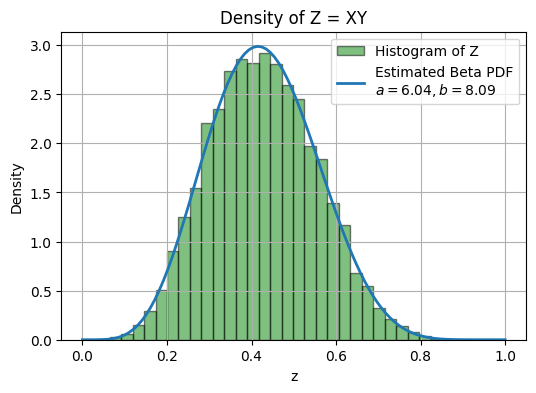

In [14]:
# 設定參數
a1, b1, a2, b2 = 6, 3, 9, 5

## MLE 設定
# 樣本數
n = 10000
# 生成來自 beta 分佈的樣本
x = beta.rvs(a1, b1, size = n)
y = beta.rvs(a2, b2, size = n)
Z = x * y

def MLE(Z):
    # 定義負對數似然函數
    def neg_log_likelihood(params):
        a, b = params
        return -np.sum(np.log(beta.pdf(Z, a, b)))

    # 初始值
    initial = [2, 2]

    # 設定邊界
    bnds = [(0, np.inf), (0, np.inf)]

    # 使用 minimize 來最小化負對數似然函數
    result = minimize(neg_log_likelihood, initial, bounds = bnds, method = 'L-BFGS-B')

    # 獲取估計的參數
    a_hat, b_hat = result.x
    return a_hat, b_hat

a_hat_mle, b_hat_mle = MLE(Z)
print(f"Estimated parameters: a = {a_hat_mle:.2f}, b = {b_hat_mle:.2f}")


# 繪圖
z = np.linspace(0, 1, 100)
fz = beta.pdf(z, a_hat_mle, b_hat_mle)

fig = plt.figure(figsize = (6, 4))
plt.hist(Z, bins = 30, density = True, alpha = 0.5, color = 'g' \
         , edgecolor = 'k', label = 'Histogram of Z')
plt.plot(z, fz, label = f'Estimated Beta PDF\n$a={a_hat_mle:.2f}, b={b_hat_mle:.2f}$' \
         , linewidth = 2)
plt.xlabel('z')
plt.ylabel('Density')
plt.title('Density of Z = XY')
plt.legend()
plt.grid()
plt.show()

Estimated parameters: a = 5.84, b = 7.81


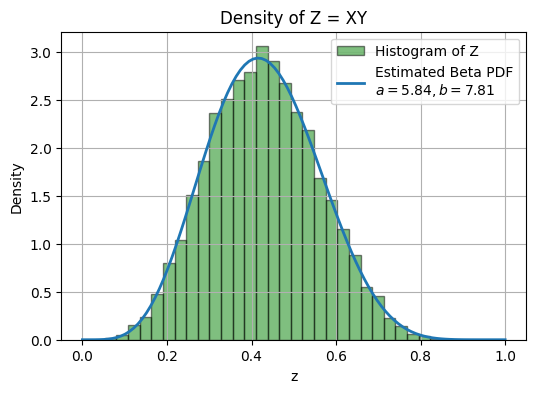

In [20]:
# 設定參數
a1, b1, a2, b2 = 6, 3, 9, 5

## MME 設定
# 樣本數
n = 10000
# 生成來自 beta 分佈的樣本
x = beta.rvs(a1, b1, size = n)
y = beta.rvs(a2, b2, size = n)
Z = x * y

def MME(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MM')
    return a_hat, b_hat

a_hat_mme, b_hat_mme = MME(Z)
print(f"Estimated parameters: a = {a_hat_mme:.2f}, b = {b_hat_mme:.2f}")


# 繪圖
z = np.linspace(0, 1, 100)
fz = beta.pdf(z, a_hat_mme, b_hat_mme)

fig = plt.figure(figsize = (6, 4))
plt.hist(Z, bins = 30, density = True, alpha = 0.5, color = 'g' \
         , edgecolor = 'k', label = 'Histogram of Z')
plt.plot(z, fz, label = f'Estimated Beta PDF\n$a={a_hat_mme:.2f}, b={b_hat_mme:.2f}$' \
         , linewidth = 2)
plt.xlabel('z')
plt.ylabel('Density')
plt.title('Density of Z = XY')
plt.legend()
plt.grid()
plt.show()

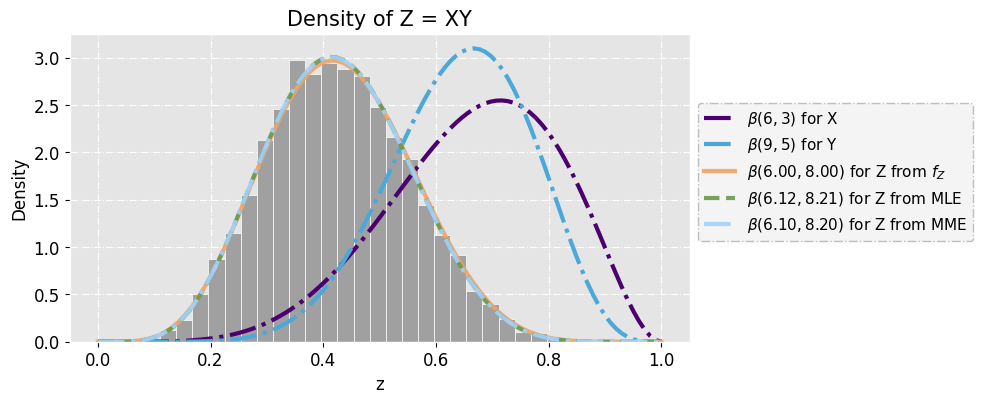

In [5]:
# 設定參數
a1, b1, a2, b2 = 6, 3, 9, 5

# 設定 X, Y 的分配
fx = lambda x: beta.pdf(x, a1, b1)
fy = lambda y: beta.pdf(y, a2, b2)

## 設定樣本
# 樣本數
n = 10000
# 生成來自 beta 分佈的樣本
x = beta.rvs(a1, b1, size = n)
y = beta.rvs(a2, b2, size = n)
Z = x * y

a_hat_lsm, b_hat_lsm = LSM(a1, b1, a2, b2)
a_hat_mle, b_hat_mle = MLE(Z)
a_hat_mme, b_hat_mme = MME(Z)


# 繪圖
z = np.linspace(0, 1, 100)
fz_lsm = beta.pdf(z, a_hat_lsm, b_hat_lsm)
fz_mle = beta.pdf(z, a_hat_mle, b_hat_mle)
fz_mme = beta.pdf(z, a_hat_mme, b_hat_mme)

plt.style.use('ggplot')
fig = plt.figure(figsize = (8, 4))
plt.plot(z, fx(z), label = f'$\\beta({a1}, {b1})$ for X', linestyle = '-.', linewidth = 3
         , color = '#4c0070')
plt.plot(z, fy(z), label = f'$\\beta({a2}, {b2})$ for Y', linestyle = '-.', linewidth = 3
         , color = '#4da8da')
plt.plot(z, fz_lsm, label = f'$\\beta({a_hat_lsm:.2f}, {b_hat_lsm:.2f})$ for Z from $f_Z$' \
         , linewidth = 3, linestyle = '-', alpha = 0.9, color = '#f4a261')
plt.plot(z, fz_mle, label = f'$\\beta({a_hat_mle:.2f}, {b_hat_mle:.2f})$ for Z from MLE' \
         , linewidth = 3, linestyle = '--', alpha = 0.9, color = '#6a994e')
plt.plot(z, fz_mme, label = f'$\\beta({a_hat_mme:.2f}, {b_hat_mme:.2f})$ for Z from MME' \
         , linewidth = 3, linestyle = '-.', alpha = 0.9, color = '#a2d2ff')
plt.hist(Z, bins = 30, density = True, color = '#A0A0A0' \
         , edgecolor = 'white')
plt.xlabel('z', fontsize = 12, color = 'black')
plt.ylabel('Density', fontsize = 12, color = 'black')
plt.title('Density of Z = XY', fontsize = 15, color = 'black')
plt.tick_params(axis = 'both', labelsize = 12, colors = 'black')
lgd = plt.legend(edgecolor = '#666666', prop = {'size': 11}, frameon = True \
                 , bbox_to_anchor = (1.47, 0.8))
lgd.get_frame().set_linestyle('-.')
lgd.get_frame().set_alpha(0.4)
lgd.get_frame().set_linewidth(1)
plt.grid(True, linestyle = '-.', color = 'white')
plt.show()

<hr>

### <strong><font color=cornflowerblue>目標三</font></strong>：



In [19]:
## 定義多變量函數最小值
def LSM(a1, b1):
    # 設定 X, Y 的分配
    fx = lambda x: beta.pdf(x, a1, b1)
    # fy = lambda y: beta.pdf(y, a2, b2)

    # z = np.linspace(0, 1, 100)
    f = lambda z : fx(1 - np.sqrt(1 - z)) / (2 * np.sqrt(1 - z))  # define the integrand: inline

    # 用另一個貝他分配 \beta(a,b) 來近似 Z 的分配
    # 定義最小值函數
    def est_beta_param(params):
        a, b = params
        beta_pdf = lambda z: beta.pdf(z, a, b)
        integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
        integral = integrate.quad(integrand, 0, 0.999)
        return integral[0]

    # 初始值
    initial = [2, 2]
    # 設定邊界
    bounds = [(0, np.inf), (0, np.inf)]

    # 使用 minimize 來最小化目標函數
    result = minimize(est_beta_param, initial, bounds = bounds \
                        , method = 'trust-constr')

    # 獲取估計的參數
    a_hat, b_hat = result.x
    return a_hat, b_hat

## 定義 MLE
def MLE(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MLE')
    return a_hat, b_hat

## 定義 MME
def MME(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MM')
    return a_hat, b_hat

In [30]:
def LSM(a1, b1):
    # 設定 X, Y 的分配
    fx = lambda x: beta.pdf(x, a1, b1)
    # fy = lambda y: beta.pdf(y, a2, b2)

    # z = np.linspace(0, 1, 100)
    f = lambda z : fx(1 - np.sqrt(1 - z)) / (2 * np.sqrt(1 - z))  # define the integrand: inline

    # 用另一個貝他分配 \beta(a,b) 來近似 Z 的分配
    # 定義最小值函數
    def est_beta_param(params):
        a, b = params
        beta_pdf = lambda z: beta.pdf(z, a, b)
        integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
        integral = integrate.quad(integrand, 0, 0.999)
        return integral[0]

    # 初始值
    initial = [2, 2]
    # 設定邊界
    bounds = [(0, np.inf), (0, np.inf)]

    # 使用 minimize 來最小化目標函數
    result = minimize(est_beta_param, initial, bounds = bounds \
                        , method = 'trust-constr')

    # 獲取估計的參數
    a_hat, b_hat = result.x
    return a_hat, b_hat

## 定義 MLE
def MLE(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MLE')
    return a_hat, b_hat

## 定義 MME
def MME(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MM')
    return a_hat, b_hat

a1, b1 = 9, 2
a_lsm, b_lsm = LSM(a1, b1)

n = 10000
# 生成來自 beta 分佈的樣本
x = beta.rvs(a1, b1, size = n)
Z = 1 - (1 - x) ** 2

a_mle, b_mle = MLE(Z)
a_mme, b_mme = MME(Z)
print(f"Estimated parameters: a = {a_lsm:.2f}, b = {b_lsm:.2f}")
print(f"Estimated parameters: a = {a_mle:.2f}, b = {b_mle:.2f}")
print(f"Estimated parameters: a = {a_mme:.2f}, b = {b_mme:.2f}")

Estimated parameters: a = 18.05, b = 0.76
Estimated parameters: a = 15.53, b = 0.74
Estimated parameters: a = 13.31, b = 0.63


c:\Users\Sheng\.vscode\env\statcomp\Lib\site-packages\scipy\stats\_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


c:\Users\Sheng\.vscode\env\statcomp\Lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


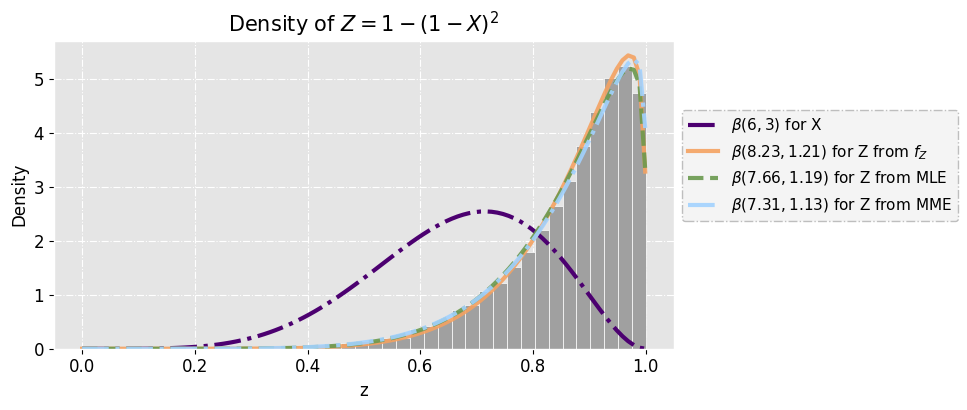

In [24]:
# 設定參數
a1, b1 = 6, 3

# 設定 X, Y 的分配
fx = lambda x: beta.pdf(x, a1, b1)

## 設定樣本
# 樣本數
n = 10000
# 生成來自 beta 分佈的樣本
x = beta.rvs(a1, b1, size = n)
Z = 1 - (1 - x) ** 2

a_hat_lsm, b_hat_lsm = LSM(a1, b1)
a_hat_mle, b_hat_mle = MLE(Z)
a_hat_mme, b_hat_mme = MME(Z)


# 繪圖
z = np.linspace(0, 0.999, 100)
fz_lsm = beta.pdf(z, a_hat_lsm, b_hat_lsm)
fz_mle = beta.pdf(z, a_hat_mle, b_hat_mle)
fz_mme = beta.pdf(z, a_hat_mme, b_hat_mme)

plt.style.use('ggplot')
fig = plt.figure(figsize = (8, 4))
plt.plot(z, fx(z), label = f'$\\beta({a1}, {b1})$ for X', linestyle = '-.', linewidth = 3
         , color = '#4c0070')
# plt.plot(z, fy(z), label = f'$\\beta({a2}, {b2})$ for Y', linestyle = '-.', linewidth = 3
#          , color = '#4da8da')
plt.plot(z, fz_lsm, label = f'$\\beta({a_hat_lsm:.2f}, {b_hat_lsm:.2f})$ for Z from $f_Z$' \
         , linewidth = 3, linestyle = '-', alpha = 0.9, color = '#f4a261')
plt.plot(z, fz_mle, label = f'$\\beta({a_hat_mle:.2f}, {b_hat_mle:.2f})$ for Z from MLE' \
         , linewidth = 3, linestyle = '--', alpha = 0.9, color = '#6a994e')
plt.plot(z, fz_mme, label = f'$\\beta({a_hat_mme:.2f}, {b_hat_mme:.2f})$ for Z from MME' \
         , linewidth = 3, linestyle = '-.', alpha = 0.9, color = '#a2d2ff')
plt.hist(Z, bins = 30, density = True, color = '#A0A0A0' \
         , edgecolor = 'white')
plt.xlabel('z', fontsize = 12, color = 'black')
plt.ylabel('Density', fontsize = 12, color = 'black')
plt.title('Density of $Z = 1 - (1 - X)^2$', fontsize = 15, color = 'black')
plt.tick_params(axis = 'both', labelsize = 12, colors = 'black')
lgd = plt.legend(edgecolor = '#666666', prop = {'size': 11}, frameon = True \
                 , bbox_to_anchor = (1.47, 0.8))
lgd.get_frame().set_linestyle('-.')
lgd.get_frame().set_alpha(0.4)
lgd.get_frame().set_linewidth(1)
plt.grid(True, linestyle = '-.', color = 'white')
plt.show()